In [ ]:
from email.mime import audio
import wave # Python library for reading and writing sound files
import numpy as np # Python library for numerical operations
import matplotlib.pyplot as plt # Python library for plotting data
from sound_tools import wave_to_db, wave_to_db_rms, wave_to_dbfs,detect_db_range
from sound_visualization import plot_signal, plot_spectrogram

In [2]:
# Load and read the WAV file
wav_obj = wave.open("sounds/decibel-10s.wav", "rb") # rb mode returns a "read only" object

sample_freq = wav_obj.getframerate() # Sample frequency of the sound file in (Hz)
print(f"Sample frequency: {sample_freq} Hz")

total_samples = wav_obj.getnframes() # Total number of frames (samples) in the sound file
print(f"Number of samples: {total_samples}")

signal_duration = total_samples / sample_freq # Calculate the duration of the sound file in seconds
print(f"Duration of the sound file: {signal_duration} s")

num_audio_channel = wav_obj.getnchannels() # getnchannels() returns the number of audio channels in the sound file
print(f"Number of audio channels: {num_audio_channel}")

raw_signal_wave = wav_obj.readframes(total_samples) # readframes() reads the sound file and returns audio data object
# print(f"Audio data: {raw_signal_wave}")

signal_amplitude_array = np.frombuffer(raw_signal_wave, dtype=np.int16) # Convert the audio data to a numpy array as a 16-bit signed integer
print(f"Audio data as numpy array: {signal_amplitude_array}")


# Check for mono or stereo and handle accordingly
channel_type = "audio"
waveform = None
if num_audio_channel == 1:  # Mono audio
    print("Mono audio detected.")
    l_channel = signal_amplitude_array  # Use the full signal array
    r_channel = None  # No right channel for mono
    channel_type = "Mono Audio"
    waveform = l_channel
else:  # Stereo audio
    print("Stereo audio detected.")
    l_channel = signal_amplitude_array[0::2]  # Left channel
    r_channel = signal_amplitude_array[1::2]  # Right channel
    channel_type = "Stereo Audio"
    waveform = l_channel

Sample frequency: 44100 Hz
Number of samples: 441000
Duration of the sound file: 10.0 s
Number of audio channels: 1
Audio data as numpy array: [405 448 463 ...   8 112 250]
Mono audio detected.


Waveform in decibels: 91.85051094307892
Waveform in decibels using RMS value: 151.85051094307892
Waveform in decibels relative to full scale: [-38.15963316 -37.28317334 -36.9971138  ... -72.24693388 -49.32437317
 -42.34993345]


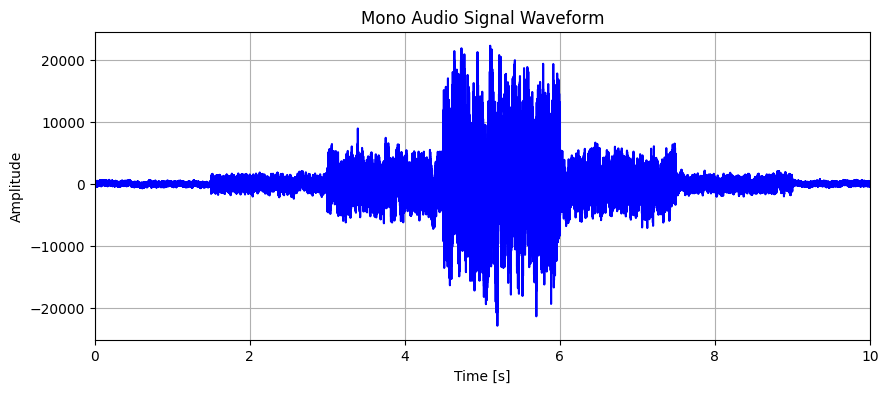

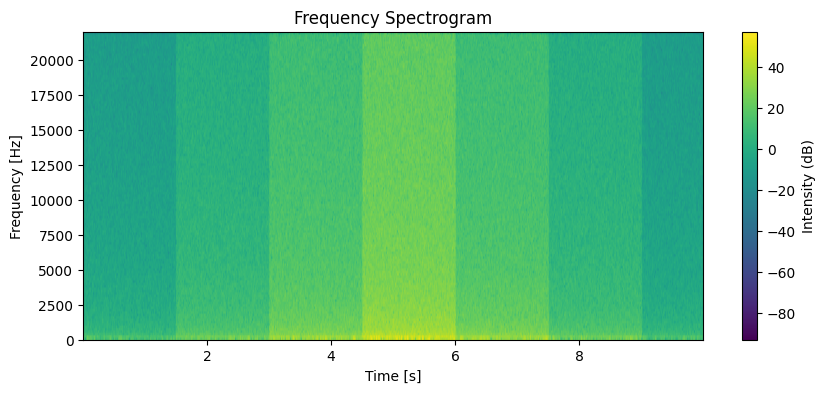

In [ ]:
#  Calculate the waveform in decibels (dB)
waveform_db = wave_to_db(waveform)
print(f"Waveform in decibels: {waveform_db}")

# Calculate the waveform in decibels using the RMS value
waveform_db_rms = wave_to_db_rms(waveform)
print(f"Waveform in decibels using RMS value: {waveform_db_rms}")

# Find the highest and smallest dB levels
highest_dB, smallest_dB = detect_db_range(waveform)
print(f"Highest dB level: {highest_dB}")
print(f"Smallest dB level: {smallest_dB}")

# Calculate the waveform in decibels relative to full scale (dBFS)
waveform_dbfs = wave_to_dbfs(waveform)
print(f"Waveform in decibels relative to full scale: {waveform_dbfs}")

# Plot the signal waveform
plot_signal(waveform, sample_freq, signal_duration, channel_type)

# Plot the spectrogram
plot_spectrogram(waveform, sample_freq)
